In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
import datetime
import seaborn as sns
%matplotlib inline
sns.set()

In [139]:
def normalize(df):
    df2 = df.copy()
    for col in df2.columns:
        if col != 'zip_code' and col!= 'month' and col!= 'year' and col!='date' and col!= 'borough' and col!='rush_hour':
            #if isinstance(df2[col].iloc[0], (int, float)):
            mean = np.mean(df2[col])
            std = np.std(df2[col])
            df2[col] = (df2[col]-mean)/std
    return df2



def remove_null(df):
    for col in df.columns:
        df = df[pd.notnull(df[col])]
    return df

def remove_null1(df):
    for col in df.columns:
        print(df[pd.notnull(df[col])])
    return df


def corrMat(corr,label,annotation = False):

    ax = plt.axes()
    #plt.ax(figsize=(300,300))
    
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=annotation)
    ax.set_title(label)
    #plt.set_title(label)
    
    plt.savefig(label)
    plt.show()
    



def corr_by_zip(df1,df2,mutual_zip ,tol = 0.5,print_all = False):
    
    #NOTE: ALL ZIP IN DF NEEDS TO BE STRING
    df1['zip_code'] = df1['zip_code'].astype('str')
    df2['zip_code'] = df2['zip_code'].astype('str')
    df1['date'] = df1['date'].astype('str')
    df2['date'] = df2['date'].astype('str')
    i = 0
    for zc in mutual_zip:
        i+=1
        if i%10 == 0:
            print(i)
        df1_sub = df1.loc[df1['zip_code']==zc]
        df2_sub = df2.loc[df2['zip_code']==zc]

        df1_sub.drop(['zip_code'],axis = 1, inplace = True)
        df2_sub.drop(['zip_code'],axis = 1, inplace = True)

        for col1 in df1_sub.columns:
            for col2 in df2_sub.columns:
                
                if col1!='date' and col2 != 'date':
                    new = df1_sub[['date',col1]].merge(df2_sub[['date',col2]],'inner','date')
                    new.drop('date',axis = 1, inplace = True)
                    
                else:
                    continue
                corr1 = np.corrcoef(np.array(new.iloc[:,0]),np.array(new.iloc[:,1]))[0][1]
                if print_all:
                    print (zc, col1, col2, corr1)
                else:
                    if np.abs(corr1) >tol:
                        print (zc,col1, col2, corr1)
                        

                        
def corr_by_year(df1,df2,mutual_year ,tol = 0.5,print_all = False):
    
    #NOTE: ALL ZIP IN DF NEEDS TO BE STRING
    df1['zip_code'] = df1['zip_code'].astype('str')
    df2['zip_code'] = df2['zip_code'].astype('str')
    df1['year'] = df1['year'].astype('str')
    df2['year'] = df2['year'].astype('str')
    i = 0
    for zc in np.array(mutual_year).astype(str):
        i+=1
        if i%10 == 0:
            print(i)
        df1_sub = df1.loc[df1['year']==zc]
        df2_sub = df2.loc[df2['year']==zc]

        df1_sub.drop(['year'],axis = 1, inplace = True)
        df2_sub.drop(['year'],axis = 1, inplace = True)

        for col1 in df1_sub.columns:
            for col2 in df2_sub.columns:
                
                if col1!='zip_code' and col2 != 'zip_code':
                    new = df1_sub[['zip_code',col1]].merge(df2_sub[['zip_code',col2]],'inner','zip_code')
                    zipc = new['zip_code']
                    new.drop('zip_code',axis = 1, inplace = True)
                    
                else:
                    continue
                corr1 = np.corrcoef(np.array(new.iloc[:,0]),np.array(new.iloc[:,1]))[0][1]
                if print_all:
                    print (zc, col1, col2, corr1)
                else:
                    if np.abs(corr1) > tol:
                        print (zc, col1, col2, corr1)
                        
def corr_by_month(df1,df2,mutual_month ,tol = 0.5,print_all = False):
    
    #NOTE: ALL ZIP IN DF NEEDS TO BE STRING
    df1['zip_code'] = df1['zip_code'].astype('str')
    df2['zip_code'] = df2['zip_code'].astype('str')
    df1['month'] = df1['month'].astype('str')
    df2['month'] = df2['month'].astype('str')
    i = 0
    for zc in np.array(mutual_month).astype(str):
        i+=1
        if i%10 == 0:
            print(i)
        df1_sub = df1.loc[df1['month']==zc]
        df2_sub = df2.loc[df2['month']==zc]

        df1_sub.drop(['month'],axis = 1, inplace = True)
        df2_sub.drop(['month'],axis = 1, inplace = True)

        for col1 in df1_sub.columns:
            for col2 in df2_sub.columns:
                
                if col1!='zip_code' and col2 != 'zip_code':
                    new = df1_sub[['zip_code',col1]].merge(df2_sub[['zip_code',col2]],'inner','zip_code')
                    zipc = new['zip_code']
                    new.drop('zip_code',axis = 1, inplace = True)
                    
                else:
                    continue
                corr1 = np.corrcoef(np.array(new.iloc[:,0]),np.array(new.iloc[:,1]))[0][1]
                if print_all:
                    print (zc, col1, col2, corr1)
                else:
                    if np.abs(corr1) > tol:
                        print (zc, col1, col2, corr1)
  

 




In [3]:
taxi_weather = pd.read_csv("taxi_wea.csv")
taxi_weather = taxi_weather[taxi_weather.date != 'date']
taxi_weather['SDW'] = np.nan_to_num(taxi_weather['SDW'].astype(float))
taxi_weather['snow_depth'] = np.nan_to_num(taxi_weather['snow_depth'].astype(float))
taxi_weather['snow_accumulation'] = np.nan_to_num(taxi_weather['snow_accumulation'].astype(float))
taxi_weather = remove_null(taxi_weather)
taxi_weather.drop('month_of_year',axis = 1, inplace = True)
taxi_weather.drop('month',axis = 1, inplace = True)
taxi_weather['zip_code'] = taxi_weather['zip_code'].astype(str)

In [130]:
twr = pd.read_csv("taxi_rush.csv")
twr = twr[twr.date != 'date']
twr['SDW'] = np.nan_to_num(twr['SDW'].astype(float))
twr['snow_depth'] = np.nan_to_num(twr['snow_depth'].astype(float))
twr['snow_accumulation'] = np.nan_to_num(twr['snow_accumulation'].astype(float))
twr = remove_null(twr)
twr.drop('month_of_year',axis = 1, inplace = True)
twr.drop('month',axis = 1, inplace = True)
twr['zip_code'] = twr['zip_code'].astype(int).astype(str)

In [14]:
for col in taxi_weather.columns:
    if col!='date' and col!='zip_code':
        taxi_weather[col] = taxi_weather[col].astype(float)

In [131]:
for col in twr.columns:
    if col!='date' and col!='zip_code' and col!='rush_hour':
        twr[col] = twr[col].astype(float)


In [17]:
taxi = taxi_weather[['date', 'zip_code', 'taxi_avg_trip_distance',
       'taxi_total_trip_distance', 'taxi_avg_amount', 'taxi_total_amount']]
weather3 = taxi_weather[['date', 'zip_code','wind_speed', 'visb', 'temp', 'prcp', 'snow_depth', 'SDW',
       'snow_accumulation']]
taxi_weather_n = normalize(taxi_weather)
weather_n = normalize(weather3)
taxi_n = normalize(taxi)

In [21]:
mutzip3 = taxi_weather.zip_code.unique()
corr_by_zip(weather_n,taxi_n,mutzip3,tol = 0.1,print_all = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


11430 visb taxi_total_amount 0.112841382437
11430 temp taxi_avg_amount -0.114578638462
11430 temp taxi_total_amount 0.228946406905
11430 snow_depth taxi_total_amount -0.107737225754
11215 temp taxi_avg_amount 0.197323555301
11215 prcp taxi_avg_trip_distance 0.163913659305
11215 prcp taxi_total_trip_distance 0.163145910833
11436 wind_speed taxi_total_trip_distance -0.162590813078
11436 wind_speed taxi_total_amount -0.142235756174
11436 temp taxi_total_trip_distance 0.314732883246
11436 temp taxi_total_amount 0.275400004047
11436 snow_depth taxi_total_trip_distance -0.217256683067
11436 snow_depth taxi_total_amount -0.199489947622
11436 SDW taxi_total_trip_distance -0.193959962506
11436 SDW taxi_total_amount -0.17746837038
11217 temp taxi_total_amount -0.10821153255
11231 temp taxi_avg_amount 0.210083039413
11231 SDW taxi_total_amount -0.100360097171
11201 temp taxi_avg_amount 0.110322634131
11201 snow_depth taxi_total_amount -0.12677003252
11201 SDW taxi_total_amount -0.141471283819
112

11420 wind_speed taxi_total_trip_distance -0.135530437154
11420 wind_speed taxi_total_amount -0.141513122734
11420 visb taxi_total_trip_distance 0.103730738695
11420 temp taxi_avg_trip_distance 0.103133617501
11420 temp taxi_total_trip_distance 0.276086303767
11420 temp taxi_total_amount 0.27573079703
11420 snow_depth taxi_total_trip_distance -0.100771340438
100
10033 temp taxi_avg_amount 0.186372026341
11368 temp taxi_total_amount 0.250530922681
10455 temp taxi_total_trip_distance -0.104748179348
10455 temp taxi_total_amount -0.120491238337
10452 temp taxi_avg_trip_distance 0.225039101001
10452 temp taxi_total_trip_distance 0.159205382296
10452 temp taxi_avg_amount 0.158990321432
10452 temp taxi_total_amount 0.123256476087
10466 visb taxi_avg_amount -0.105622551342
10306 snow_depth taxi_avg_trip_distance 0.160017663819
10306 snow_depth taxi_avg_amount 0.110228485181
10306 SDW taxi_avg_trip_distance 0.12084625207
110
11235 temp taxi_total_trip_distance 0.114253444378
11385 temp taxi_av

KeyboardInterrupt: 

In [117]:
taxi_weather_highwind = taxi_weather[taxi_weather['wind_speed']>10]
taxi_wind = taxi_weather_highwind[['date', 'zip_code', 'taxi_avg_trip_distance',
       'taxi_total_trip_distance', 'taxi_avg_amount', 'taxi_total_amount']]
weather3_wind = taxi_weather_highwind[['date', 'zip_code','wind_speed', 'visb', 'temp', 'prcp', 'snow_depth', 'SDW',
       'snow_accumulation']]

In [118]:
corr_by_zip(normalize(weather3_wind),normalize(taxi_wind),mutzip3,tol = 0.5,print_all = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


11430 wind_speed taxi_avg_trip_distance -0.644395876466
11430 wind_speed taxi_avg_amount -0.618852277619
11201 temp taxi_avg_trip_distance 0.550015341264
11201 snow_depth taxi_avg_trip_distance -0.594678777482
11201 SDW taxi_avg_trip_distance -0.551161171656
10
11435 visb taxi_avg_trip_distance 0.527960152742
11435 snow_depth taxi_total_trip_distance -0.568698142617
11435 snow_depth taxi_total_amount -0.552550915426
11435 SDW taxi_avg_trip_distance -0.525791007772
11435 SDW taxi_total_trip_distance -0.585331604769
11435 SDW taxi_total_amount -0.565061146365
10280 snow_depth taxi_total_trip_distance -0.532034307021
10280 snow_depth taxi_total_amount -0.519455529815
10280 SDW taxi_total_trip_distance -0.510809229787
10280 SDW taxi_total_amount -0.500249462969
10038 temp taxi_avg_trip_distance 0.564105050804
10038 snow_depth taxi_total_trip_distance -0.516809012202
10006 snow_depth taxi_total_trip_distance -0.552893443152
10006 snow_depth taxi_total_amount -0.545492852516
10006 SDW taxi_t

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


11235 temp taxi_total_trip_distance 0.578662012086
120
10305 snow_depth taxi_avg_amount 0.850312537648
10305 SDW taxi_avg_amount 0.88843835859
11692 visb taxi_avg_amount -0.703158114993
130
11004 wind_speed taxi_total_trip_distance -0.641528547769
11004 prcp taxi_total_trip_distance 0.867895707754
11004 prcp taxi_total_amount 0.888691060824
10115 temp taxi_total_trip_distance 0.511540500694
10314 temp taxi_avg_amount -0.682561963254
10314 snow_depth taxi_avg_amount 0.876475585055
10314 SDW taxi_avg_amount 0.926898304184
11360 prcp taxi_avg_amount -0.619098319588
11360 prcp taxi_total_amount -0.599920371089
140
11419 visb taxi_avg_trip_distance -0.546110409807
11419 visb taxi_avg_amount -0.591807668409
11428 temp taxi_avg_trip_distance 0.544205981928
11428 temp taxi_avg_amount 0.596479855113
11428 prcp taxi_avg_amount 0.656605192841


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


10308 wind_speed taxi_avg_trip_distance -1.0
10308 wind_speed taxi_total_trip_distance -1.0
10308 wind_speed taxi_avg_amount -1.0
10308 wind_speed taxi_total_amount -1.0
10308 visb taxi_avg_trip_distance 1.0
10308 visb taxi_total_trip_distance 1.0
10308 visb taxi_avg_amount 1.0
10308 visb taxi_total_amount 1.0
10308 temp taxi_avg_trip_distance -1.0
10308 temp taxi_total_trip_distance -1.0
10308 temp taxi_avg_amount -1.0
10308 temp taxi_total_amount -1.0
10308 prcp taxi_avg_trip_distance -1.0
10308 prcp taxi_total_trip_distance -1.0
10308 prcp taxi_avg_amount -1.0
10308 prcp taxi_total_amount -1.0
11040 wind_speed taxi_avg_amount -0.532334081769
11040 wind_speed taxi_total_amount -0.532334081769
11040 temp taxi_avg_trip_distance 0.945027581272
11040 temp taxi_total_trip_distance 0.945027581272
11040 temp taxi_avg_amount 0.919222289887
11040 temp taxi_total_amount 0.919222289887
11040 prcp taxi_avg_trip_distance 0.999022519171
11040 prcp taxi_total_trip_distance 0.999022519171
11040 prcp

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


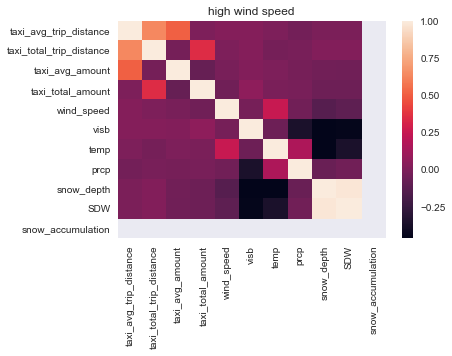

In [31]:
corrMat(normalize(taxi_weather_highwind).corr(),'high wind speed')

In [35]:
taxi_weather_highwind_byzip=taxi_weather_highwind.groupby(["zip_code"]).mean()

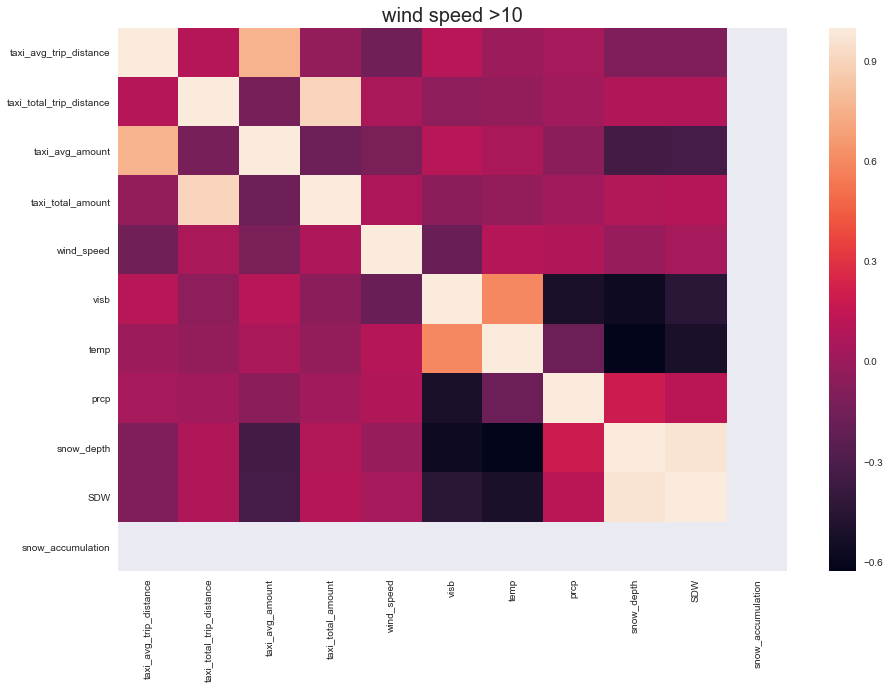

In [196]:
#corrMat(normalize(taxi_weather_highwind_byzip).corr(),'high wind speed')

plt.figure(figsize = ((15,10)))
sns.heatmap(normalize(taxi_weather_highwind_byzip).corr(),fmt='5g')
plt.title('wind speed >10',size = 20)
plt.savefig('taxi_weather_highwind')

In [122]:
tw_wind_11040 = taxi_weather_highwind[taxi_weather_highwind.zip_code == "11430"]

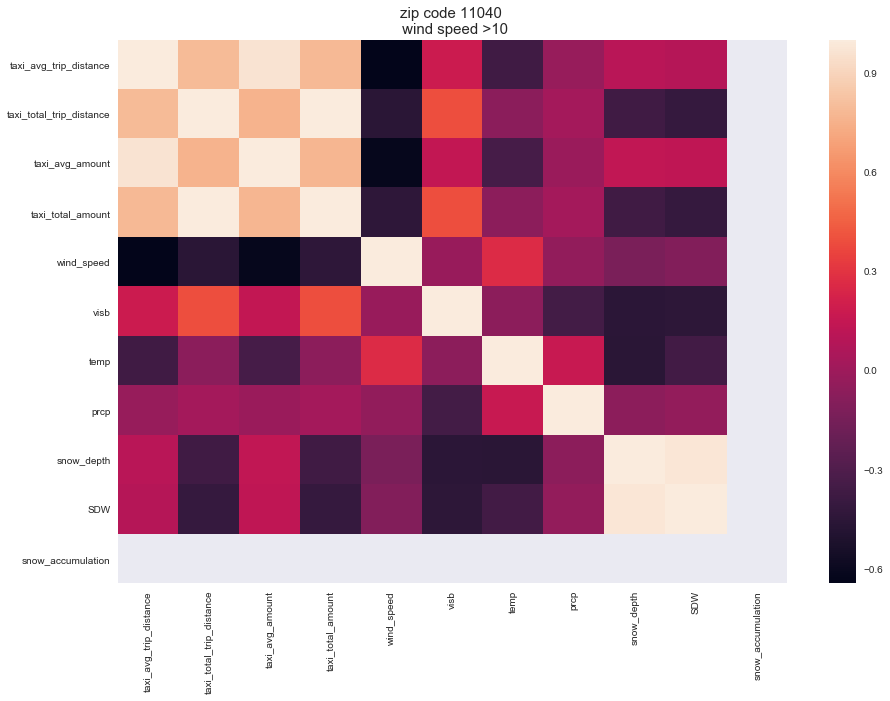

In [201]:
plt.figure(figsize = ((15,10)))
sns.heatmap(normalize(tw_wind_11040).corr(),fmt='5g')
plt.title('zip code 11040 \n wind speed >10',size = 15)
plt.savefig('taxi_weather_highwind')

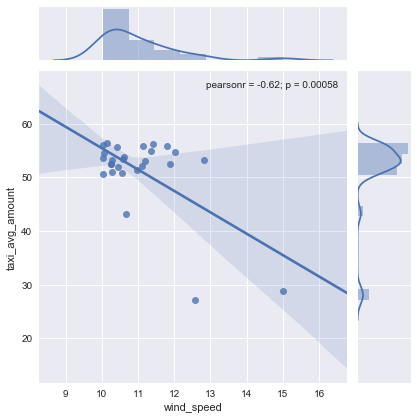

In [123]:

sns.jointplot("wind_speed", "taxi_avg_amount", tw_wind_11040, kind = "reg")
plt.savefig('weakness2,wind_speed_10')

In [79]:
borough = pd.read_csv("borough_zip.csv")
borough = remove_null(borough)
borough['zip_code'] = borough['zip_code'].astype(int).astype(str)
taxi_weather_borough = taxi_weather.merge(borough,'inner','zip_code')
taxi_weather_borough.drop('zip_code',axis = 1, inplace = True)

In [108]:
manh = taxi_weather_borough[taxi_weather_borough['borough'] == "MANHATTAN"]

In [109]:
manh_day  = manh.groupby(['date'],as_index = False).max()

In [110]:
manh_day.taxi_total_amount[0].dtype

dtype('float64')

In [111]:
manh_day_n = normalize(manh_day)
manh_day_n.wind_speed.describe()

count    1.643000e+03
mean     7.732031e-17
std      1.000304e+00
min     -2.206818e+00
25%     -7.364246e-01
50%     -1.673205e-01
75%      5.706989e-01
max      5.294198e+00
Name: wind_speed, dtype: float64

In [116]:
manh_day_n.corr()

,taxi_avg_trip_distance,taxi_total_trip_distance,taxi_avg_amount,taxi_total_amount,wind_speed,visb,temp,prcp,snow_depth,SDW,snow_accumulation
taxi_avg_trip_distance,1.000000,0.474069,0.019972,-0.002182,-0.012647,0.023257,0.039543,-0.018802,0.008722,0.014310,NaN
taxi_total_trip_distance,0.474069,1.000000,0.005155,-0.005064,0.017949,0.035983,0.009537,-0.014121,0.035830,0.052247,NaN
taxi_avg_amount,0.019972,0.005155,1.000000,0.264597,-0.025116,-0.007495,0.017658,0.008730,-0.011528,-0.007889,NaN
taxi_total_amount,-0.002182,-0.005064,0.264597,1.000000,-0.011289,-0.013733,-0.058414,0.043439,-0.062483,-0.072424,NaN
wind_speed,-0.012647,0.017949,-0.025116,-0.011289,1.000000,0.018720,-0.311021,0.151108,0.078492,0.062919,NaN
visb,0.023257,0.035983,-0.007495,-0.013733,0.018720,1.000000,0.089012,-0.400070,-0.103526,-0.082326,NaN
temp,0.039543,0.009537,0.017658,-0.058414,-0.311021,0.089012,1.000000,0.036590,-0.318368,-0.268096,NaN
prcp,-0.018802,-0.014121,0.008730,0.043439,0.151108,-0.400070,0.036590,1.000000,0.045836,0.043379,NaN
snow_depth,0.008722,0.035830,-0.011528,-0.062483,0.078492,-0.103526,-0.318368,0.045836,1.000000,0.958235,NaN
SDW,0.014310,0.052247,-0.007889,-0.072424,0.062919,-0.082326,-0.268096,0.043379,0.958235,1.000000,NaN


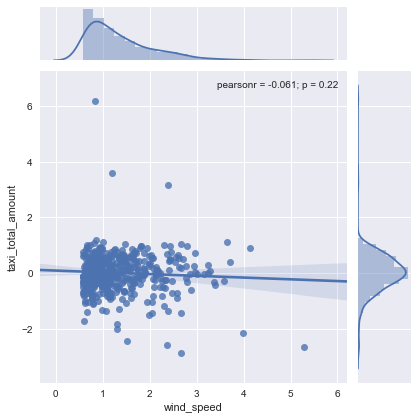

In [112]:
manh_day_wind = manh_day_n[manh_day_n['wind_speed']>5.706989e-01]
sns.jointplot("wind_speed", "taxi_total_amount", manh_day_wind, kind = "reg")

In [140]:
twr_r = twr[twr['rush_hour']=='R']
twr_r.drop('rush_hour',axis = 1, inplace = True)
twr_nr = twr[twr['rush_hour']=='NR']
twr_nr.drop('rush_hour',axis = 1, inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [141]:
t_r = twr_r[['date', 'zip_code', 'taxi_avg_trip_distance',
       'taxi_total_trip_distance', 'taxi_avg_amount', 'taxi_total_amount']]
w_r = twr_r[['date', 'zip_code','wind_speed', 'visb', 'temp', 'prcp', 'snow_depth', 'SDW',
       'snow_accumulation']]
twr_rn = normalize(twr_r)
w_rn = normalize(w_r)
t_rn = normalize(t_r)


t_nr = twr_nr[['date', 'zip_code', 'taxi_avg_trip_distance',
       'taxi_total_trip_distance', 'taxi_avg_amount', 'taxi_total_amount']]
w_nr = twr_nr[['date', 'zip_code','wind_speed', 'visb', 'temp', 'prcp', 'snow_depth', 'SDW',
       'snow_accumulation']]
twr_nrn = normalize(twr_nr)
w_nrn = normalize(w_nr)
t_nrn = normalize(t_nr)

In [168]:
mutzip3 = t_r.zip_code.unique()
corr_by_zip(w_rn,t_rn,mutzip3,tol = 0.5,print_all = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


10002 temp taxi_avg_amount 0.566412942155
10
20
10036 temp taxi_avg_amount 0.532590047544
30
40
50
60
70
80
90
100
110
120
130
140
150
160
10306 prcp taxi_avg_trip_distance 0.655488564133
10306 prcp taxi_total_trip_distance 0.638984328878
10306 prcp taxi_avg_amount 0.578769998839
10306 prcp taxi_total_amount 0.561510274003
11363 temp taxi_avg_amount 0.523723579425
11363 temp taxi_total_amount 0.503527270098
170
11697 wind_speed taxi_total_amount 0.586726655919
11697 snow_depth taxi_total_trip_distance -0.601127136084
11697 snow_depth taxi_total_amount -0.582510985573
11697 SDW taxi_total_trip_distance -0.601127136084
11697 SDW taxi_total_amount -0.582510985573
11362 visb taxi_total_trip_distance -0.534667657944
11001 wind_speed taxi_total_amount 0.601832563684
180
11005 visb taxi_avg_trip_distance -0.991548695941
11005 visb taxi_total_trip_distance -0.991548695941
11005 visb taxi_avg_amount -0.94944073172
11005 visb taxi_total_amount -0.94944073172
11005 prcp taxi_avg_trip_distance 0.9

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


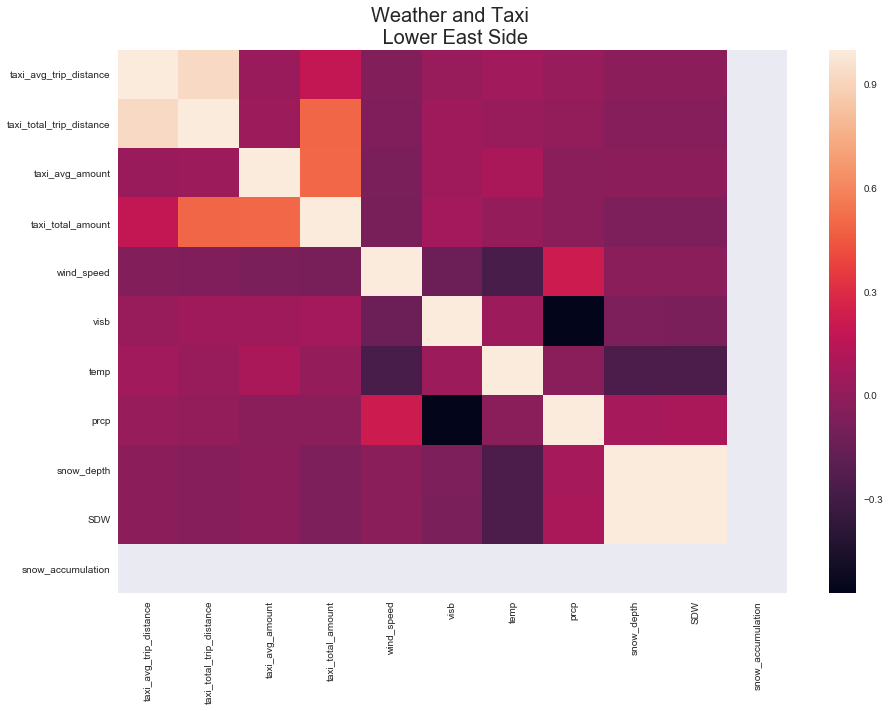

In [197]:
weather_taxi_all_10002 = twr[twr['zip_code'] == '10002']
#corrMat(normalize(weather_taxi_all_10002).corr(),'weather and taxi \n zip code 10002')

plt.figure(figsize = ((15,10)))
sns.heatmap(normalize(weather_taxi_all_10002).corr(),fmt='5g')
plt.title('Weather and Taxi \n Lower East Side',size = 20)
plt.savefig('Weather and Taxi by day LES')

In [181]:
#10002 temp taxi_avg_amount 0.532590047544
#RUSH HOUR
weather_taxi_r_10002 = twr_r[twr_r['zip_code'] == '10002']
#weather_rush_10036 = twr[twr['zip_code'] == '10036']
#taxi_rush_10036 = twr[twr['zip_code'] == '10036']

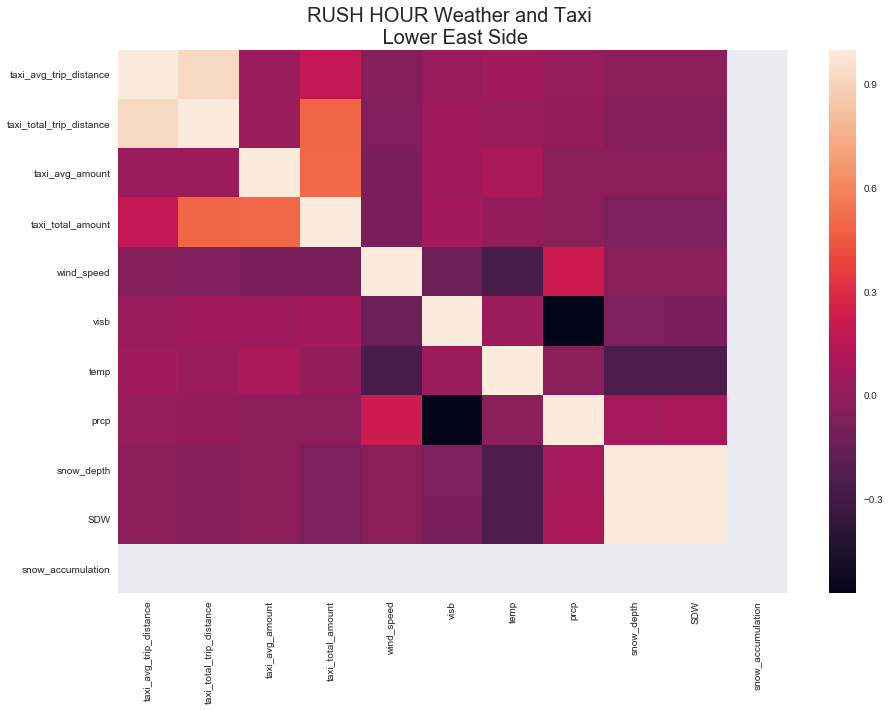

In [198]:
#corrMat(normalize(weather_taxi_r_10002).corr(),'Rush hour weather and taxi \n zip code 10002')
plt.figure(figsize = ((15,10)))
sns.heatmap(normalize(weather_taxi_all_10002).corr(),fmt='5g')
plt.title('RUSH HOUR Weather and Taxi \n Lower East Side',size = 20)
plt.savefig('rush_hour_Weather and Taxi by day LES')

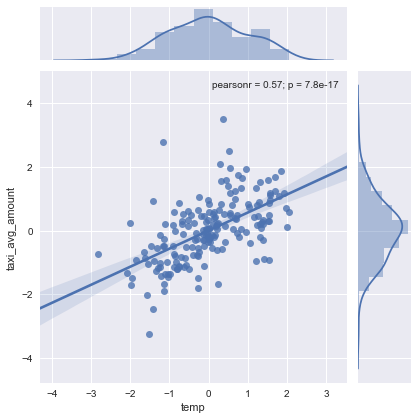

In [202]:
plt.figure(figsize=(25,20))#sns.lmplot('temp', 'complaint_count',cw311_10458)
sns.jointplot('temp', 'taxi_avg_amount', data=normalize(weather_taxi_r_10002), kind="reg")
plt.savefig('temp_taxi_rush_scat',dpi = 500)


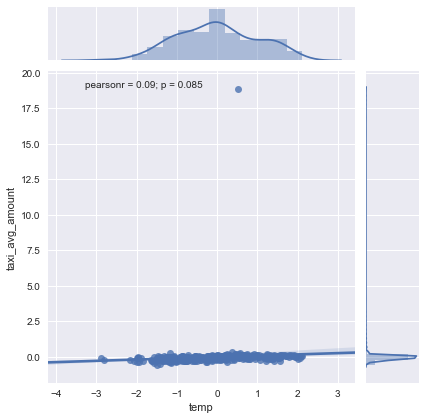

In [203]:
plt.figure(figsize=(25,20))#sns.lmplot('temp', 'complaint_count',cw311_10458)
sns.jointplot('temp', 'taxi_avg_amount', data=normalize(weather_taxi_all_10002), kind="reg")
plt.savefig('temp_taxi_all_scat,noCorr',dpi = 500)


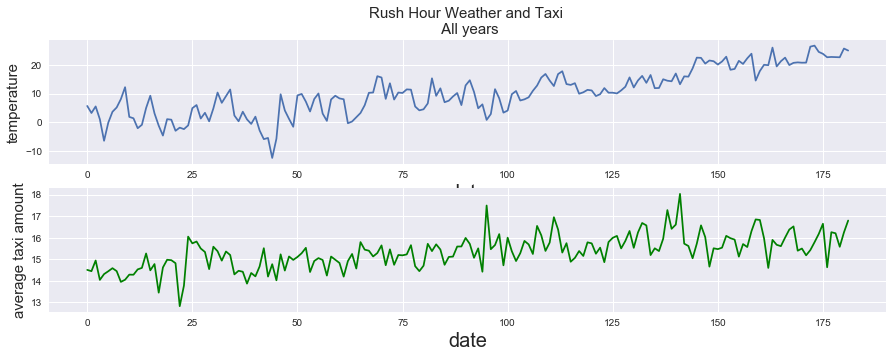

In [189]:
weather_taxi_r_10002_sorted = weather_taxi_r_10002.sort_values(by = 'date')
#temp_tripCount_10007_sorted = normalize(temp_tripCount_10007_sorted)
x = np.arange(len(weather_taxi_r_10002_sorted.date))
y = weather_taxi_r_10002_sorted [['temp']]
'''
plt.plot(x, y)
plt.title('Weather and Citibike \n from 2013-06-01 to 2018-01-01')
plt.xlabel('date')
plt.ylabel('temperature')
#plt.legend(y)
plt.show()
'''
y2 = weather_taxi_r_10002_sorted [['taxi_avg_amount']]
'''
plt.plot(x, y2)
plt.title('Weather and Citibike \n from 2013-06-01 to 2018-01-01')
plt.xlabel('date')
plt.ylabel('total trip count')

plt.show()
'''
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(2,1,1)
ax1.plot(x, y)
plt.title('Rush Hour Weather and Taxi \n All years',size = 15)
plt.xlabel('date',size = 20)
plt.ylabel('temperature',size = 15)

ax2=fig.add_subplot(2,1,2)
plt.plot(x, y2,'green')
plt.xlabel('date',size = 20)
plt.ylabel('average taxi amount',size = 15)
plt.savefig('temp_taxi_rush',dpi=1000)

plt.show()